# Processor Simulator Analysis

### Load modules and define graph functions

In [104]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import brewer2mpl
import os


# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

def remove_splines(ax, spl):
    for s in spl:
        ax.spines[s].set_visible(False)  

def modify_splines(ax, lwd, col):    
    for s in ['bottom', 'left','top','right']:
        ax.spines[s].set_linewidth(lwd)
        ax.spines[s].set_color(col)    

def ggplot(ax):
    
    modify_splines(ax, lwd=0.75, col='0.8')
    remove_splines(ax, ['top','right'])
    
    ax.patch.set_facecolor('0.93')
    ax.yaxis.grid(True, 'major', color='0.98', linestyle='-', linewidth=1.0)
    
    ax.set_axisbelow(True)   
    
    
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        
        if (height != 0):
            ax.text(rect.get_x() + rect.get_width()/2., 1.015*height,
                    '%.1f' % float(height),
                    ha='center', va='bottom', fontsize=12)

### Load data from simulator log files

In [105]:

## Get result directories
programs = [x[0] for x in os.walk('.')]
programs.remove('./.ipynb_checkpoints')
programs.remove('./bubble_sort')


programs.remove('.')
programs = [x[2:] for x in programs]

## Read results
non_pipelined = {}
pipelined     = {}
superscalar_2bit   = {}
superscalar_taken   = {}
superscalar_not_taken   = {}





def parse_processor_logs(filename, result_dict):
    for p in programs:
        file = open(p + filename, "r")
        file.readline()
        line = file.readline()
        while line[0] != '#':
            split_line = line.split(',')
#             result_dict[split_line[0]] = split_line[1][:-1]
            line = file.readline()

        line = file.readline()
        while line[0] != '#':
            split_line = line.split(',')
            if split_line[0] in result_dict:
                result_dict[split_line[0]] = result_dict[split_line[0]] + [float(split_line[1][:-1])] 
            else:
                result_dict[split_line[0]] = [float(split_line[1][:-1])]
            line = file.readline()


            
parse_processor_logs("/non-pipelined.log", non_pipelined)
parse_processor_logs("/pipelined.log", pipelined)
parse_processor_logs("/superscalar-nt.log", superscalar_not_taken)
parse_processor_logs("/superscalar-t.log", superscalar_taken)
parse_processor_logs("/superscalar.log", superscalar_2bit)

print(non_pipelined)
print(pipelined)
print(superscalar_not_taken)
print(superscalar_taken)
print(superscalar_2bit)

{'Instructions per Cycle': [0.33, 0.28, 0.33, 0.27, 0.33, 0.33, 0.27], 'Proportion of Program spent Waiting for Memory Access': [0.0, 0.15, 0.0, 0.2, 0.01, 0.0, 0.18], 'Branch Prediction Accuracy': [nan, nan, nan, nan, nan, nan, nan]}
{'Instructions per Cycle': [0.67, 0.54, 1.0, 0.49, 0.67, 0.43, 0.53], 'Proportion of Program spent Waiting for Memory Access': [0.0, 0.28, 0.0, 0.37, 0.03, 0.0, 0.35], 'Branch Prediction Accuracy': [-inf, -inf, -inf, -inf, -inf, -inf, nan]}
{'Instructions per Cycle': [2.97, 2.12, 1.0, 1.26, 1.45, 2.2, 0.82], 'Proportion of Program spent Waiting for Memory Access': [0.0, 0.83, 0.0, 1.13, 0.1, 0.02, 0.64], 'Branch Prediction Accuracy': [1.0, 0.75, 0.0, 0.86, 0.92, 0.99, nan]}
{'Instructions per Cycle': [0.71, 2.19, 4.93, 0.64, 0.7, 0.54, 0.82], 'Proportion of Program spent Waiting for Memory Access': [0.0, 0.68, 0.0, 0.52, 0.03, 0.0, 0.64], 'Branch Prediction Accuracy': [0.0, 0.25, 1.0, 0.14, 0.08, 0.01, nan]}
{'Instructions per Cycle': [2.95, 1.92, 4.93, 1

### Produce graphs from simultator logs

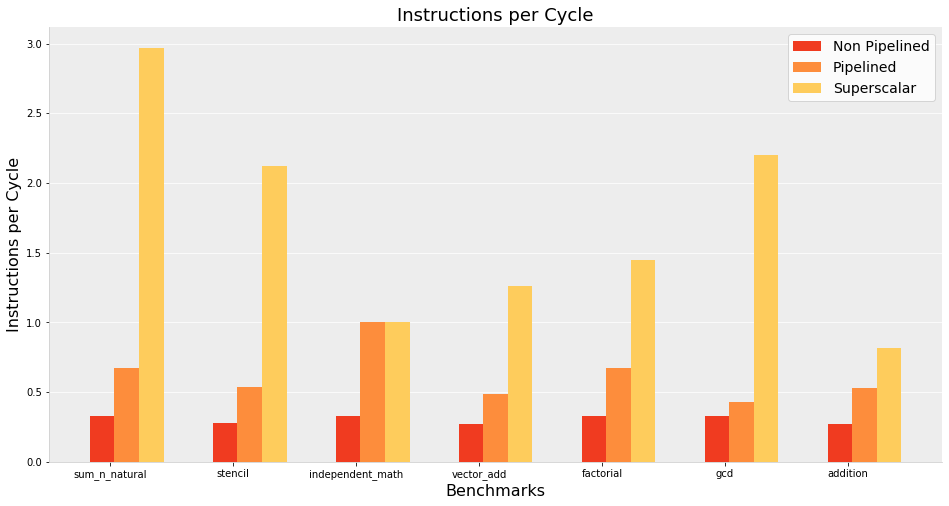

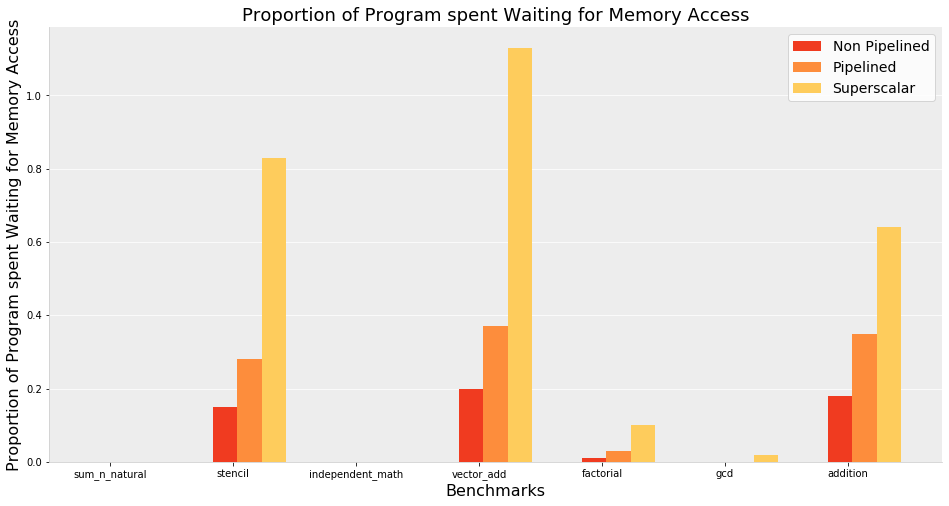

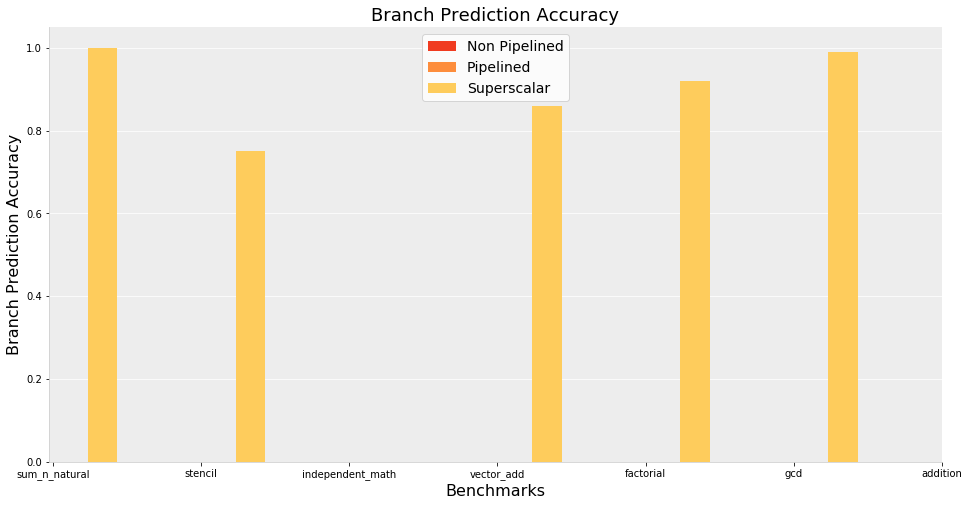

In [106]:
for key in non_pipelined:
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    color = brewer2mpl.get_map('YlOrRd', 'Sequential', 5).mpl_colors

    # data to plot
    n_groups = len(programs)

    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 1.0

    rects1 = plt.bar(index, non_pipelined[key], bar_width,
                     alpha=opacity,color=color[3],label='Non Pipelined')
    rects2 = plt.bar(index+bar_width, pipelined[key], bar_width,
                     alpha=opacity,color=color[2],label='Pipelined')
    rects3 = plt.bar(index+2*bar_width, superscalar_not_taken[key], bar_width,
                     alpha=opacity,color=color[1],label='Superscalar')

    ax.set_xlabel('Benchmarks', fontsize=16)
    ax.set_ylabel(key, fontsize=16)
    ax.set_title(key, fontsize=18)

    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')

    plt.xticks(index + 0.33*bar_width, programs)

    ax.legend(fontsize=14)
    ggplot(ax)
    plt.savefig(key + " (serial_vs_superscalar).pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

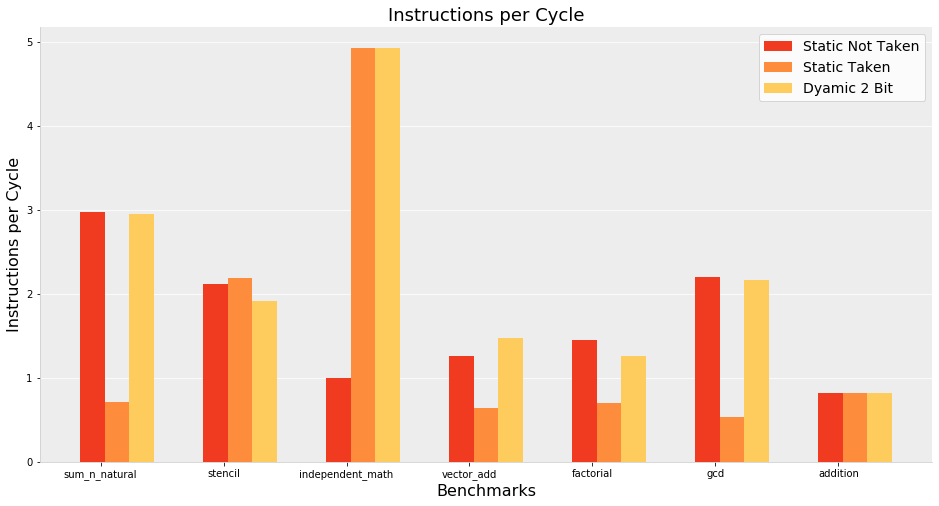

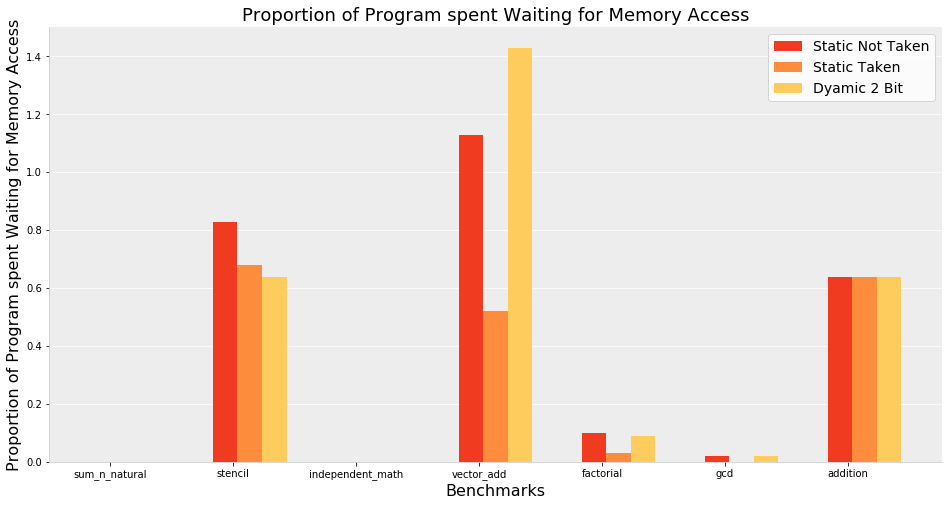

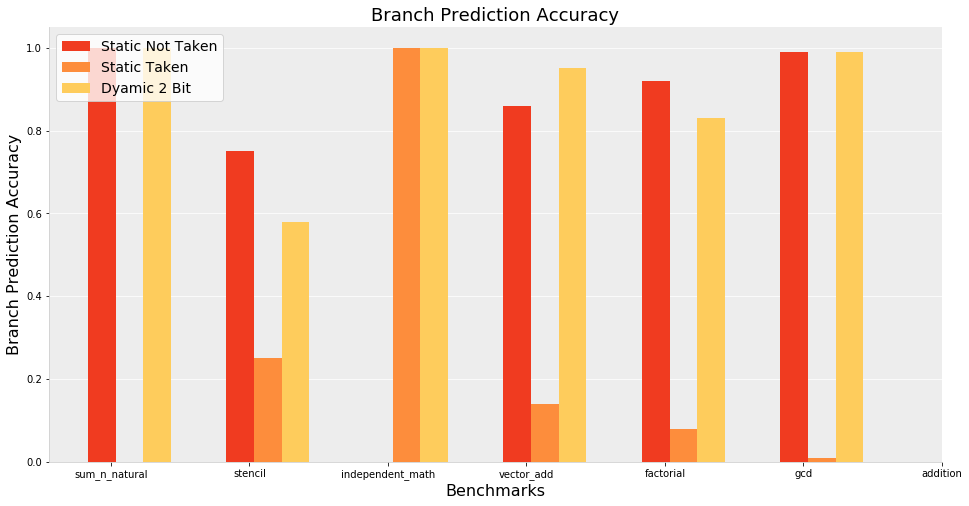

In [107]:
for key in non_pipelined:
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    color = brewer2mpl.get_map('YlOrRd', 'Sequential', 5).mpl_colors

    # data to plot
    n_groups = len(programs)

    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 1.0

    rects1 = plt.bar(index, superscalar_not_taken[key], bar_width,
                     alpha=opacity,color=color[3],label='Static Not Taken')
    rects2 = plt.bar(index+bar_width, superscalar_taken[key], bar_width,
                     alpha=opacity,color=color[2],label='Static Taken')
    rects3 = plt.bar(index+2*bar_width, superscalar_2bit[key], bar_width,
                     alpha=opacity,color=color[1],label='Dyamic 2 Bit')

    ax.set_xlabel('Benchmarks', fontsize=16)
    ax.set_ylabel(key, fontsize=16)
    ax.set_title(key, fontsize=18)

    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')

    plt.xticks(index + 0.33*bar_width, programs)

    ax.legend(fontsize=14)
    ggplot(ax)
    plt.savefig(key + " (comparing_branch_predictors).pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()